In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('EM.csv')  # Make sure the file name is correct

# Display the first few rows to check the data
data.head()


,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.0,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.0,2582700.0,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.0,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.0,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.0,553800.0,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519


In [2]:
# Calculate descriptive statistics for the Creditscore and CreditlimitGBPGBP

stats = data[['Creditscore', 'CreditlimitGBPGBP']].describe()
print(stats)


       Creditscore  CreditlimitGBPGBP
count  8176.000000       6.771000e+03
mean     57.300514       5.292997e+05
std      29.730987       2.983264e+06
min      15.000000       5.000000e+02
25%      29.000000       5.000000e+02
50%      45.000000       1.543000e+04
75%      90.000000       2.342970e+05
max      99.000000       5.000000e+07


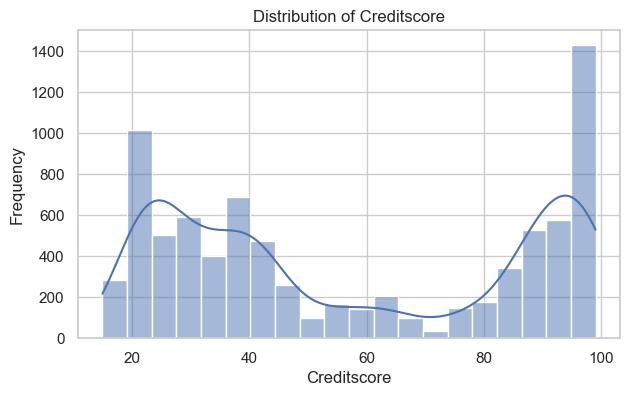

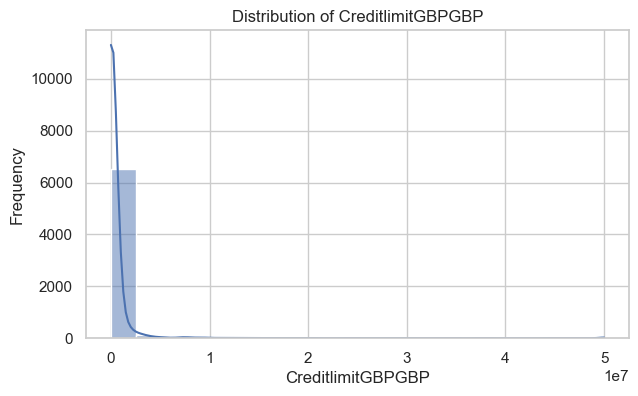

In [3]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of Creditscore
plt.figure(figsize=(7, 4))
sns.histplot(data['Creditscore'], bins=20, kde=True)
plt.title('Distribution of Creditscore')
plt.xlabel('Creditscore')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of CreditlimitGBPGBP
plt.figure(figsize=(7, 4))
sns.histplot(data['CreditlimitGBPGBP'], bins=20, kde=True)
plt.title('Distribution of CreditlimitGBPGBP')
plt.xlabel('CreditlimitGBPGBP')
plt.ylabel('Frequency')
plt.show()


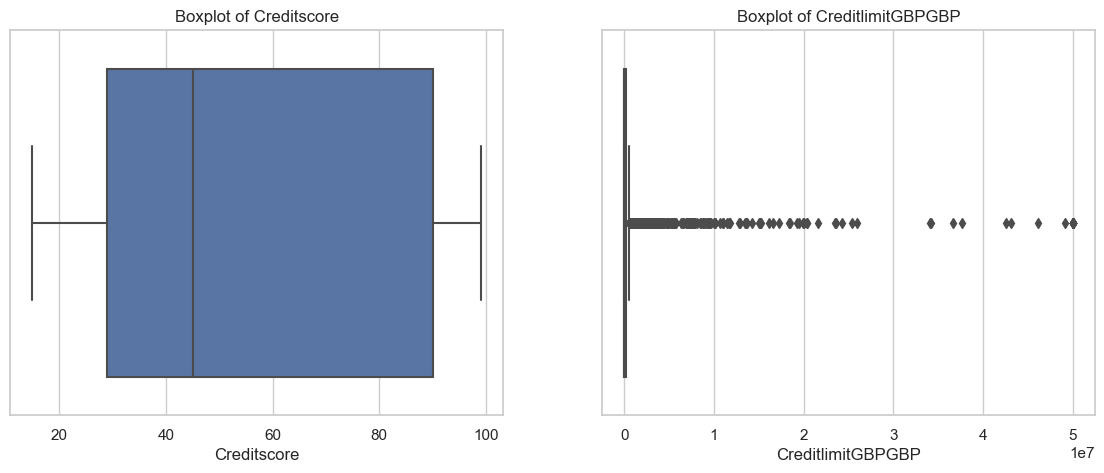

In [4]:
# Plotting boxplots for visualizing outliers
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Creditscore'])
plt.title('Boxplot of Creditscore')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['CreditlimitGBPGBP'])
plt.title('Boxplot of CreditlimitGBPGBP')
plt.show()


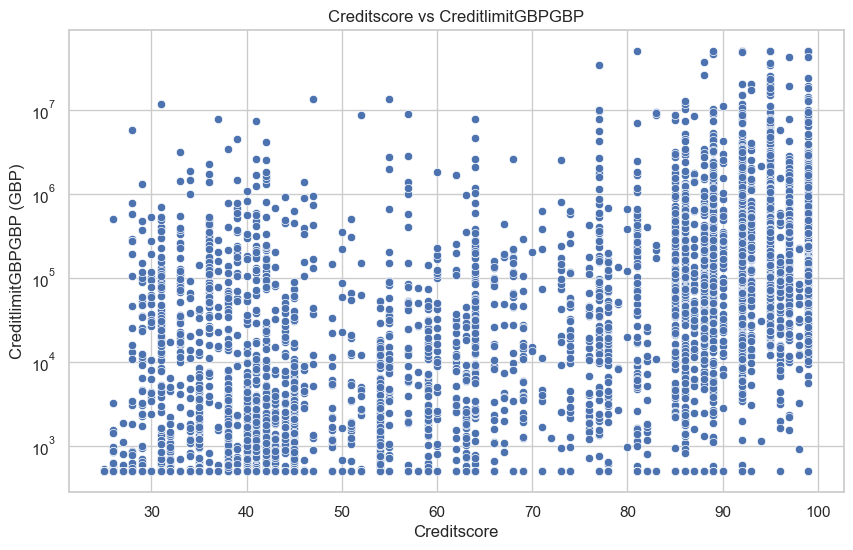

In [5]:
# Scatter plot to explore the relationship between Creditscore and CreditlimitGBPGBP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Creditscore'], y=data['CreditlimitGBPGBP'])
plt.title('Creditscore vs CreditlimitGBPGBP')
plt.xlabel('Creditscore')
plt.ylabel('CreditlimitGBPGBP (GBP)')
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.grid(True)
plt.show()


2.DATA CLEANING AND PROCESSING FOR 70&30% TEST AND TRAINIGN DATA 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('EM.csv')

# Remove non-numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Handle missing values by filling with the mean of each column
numerical_data_filled = numerical_data.fillna(numerical_data.mean())

# Display the cleaned data
print(numerical_data_filled.head())


   Creditscore  Likelihoodoffailure  CreditlimitGBPGBP  Previouscreditscore  \
0           92                  0.9         50000000.0                 95.0   
1           92                  0.9         50000000.0                 99.0   
2           95                  0.9         16574000.0                 99.0   
3           89                  0.9          5380000.0                 92.0   
4           99                  0.9         50000000.0                 99.0   

   ReturnonTotalAssets2020  ReturnonTotalAssets2019  \
0                27.903380                 5.614489   
1                -0.130484                 2.832746   
2                27.903380                 3.817802   
3                27.903380                -5.702719   
4                21.144665                26.910621   

   ReturnonShareholdersFunds2020  ReturnonShareholdersFunds2019  \
0                      65.895390                      10.284360   
1                      -0.283735                       7.000

Create credit level feature

In [9]:
# Calculate the mean of Creditscore
creditscore_mean = numerical_data_filled['Creditscore'].mean()

# Create 'CreditLevel' where 1 if Creditscore > mean, else 0
numerical_data_filled['CreditLevel'] = (numerical_data_filled['Creditscore'] > creditscore_mean).astype(int)

# Set 'CreditLevel' as the target variable Y and the rest as X
X = numerical_data_filled.drop(columns=['CreditLevel'])
Y = numerical_data_filled['CreditLevel']


In [10]:
# Split the data into 70% training and 30% testing set with a random state of 123
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the datasets to verify
print("Training set (X_train_scaled):", X_train_scaled.shape)
print("Test set (X_test_scaled):", X_test_scaled.shape)


Training set (X_train_scaled): (5723, 70)
Test set (X_test_scaled): (2453, 70)


EXTRA TREE CLASSIFIER

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate and train the Extra Trees model
et_classifier = ExtraTreesClassifier(random_state=123)
et_classifier.fit(X_train_scaled, Y_train)

# Predict on the test data
et_predictions = et_classifier.predict(X_test_scaled)

# Evaluate the model
et_accuracy = accuracy_score(Y_test, et_predictions)
print("Extra Trees Classifier Accuracy:", et_accuracy)
print(classification_report(Y_test, et_predictions))

# Feature Importance from Extra Trees
et_feature_importances = et_classifier.feature_importances_
features = X.columns
et_feature_importance = pd.DataFrame({'Feature': features, 'Importance': et_feature_importances}).sort_values(by='Importance', ascending=False)
print(et_feature_importance)


Extra Trees Classifier Accuracy: 0.9951080309824705
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1356
           1       0.99      1.00      0.99      1097

    accuracy                           1.00      2453
   macro avg       0.99      1.00      1.00      2453
weighted avg       1.00      1.00      1.00      2453

                      Feature  Importance
0                 Creditscore    0.446949
1         Likelihoodoffailure    0.226676
3         Previouscreditscore    0.148910
59                Gearing2019    0.010693
17         StockTurnoverx2019    0.009203
..                        ...         ...
46         InterestCoverx2020    0.000984
62          TaxationthGBP2020    0.000923
54            EBITDAthGBP2020    0.000883
24  IntangibleAssetsthGBP2020    0.000823
42     CapitalExpenditure2020    0.000404

[70 rows x 2 columns]


LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the Logistic Regression model
log_reg = LogisticRegression(random_state=123)
log_reg.fit(X_train_scaled, Y_train)

# Predict on the test data
log_reg_predictions = log_reg.predict(X_test_scaled)

# Evaluate the model
log_reg_accuracy = accuracy_score(Y_test, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print(classification_report(Y_test, log_reg_predictions))


Logistic Regression Accuracy: 0.9914390542193233
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



In [13]:
et_classifier.fit(X_train_scaled, Y_train)
log_reg.fit(X_train_scaled, Y_train)


LogisticRegression(random_state=123)

In [14]:
et_predictions = et_classifier.predict(X_test_scaled)
log_reg_predictions = log_reg.predict(X_test_scaled)


In [15]:
et_accuracy = accuracy_score(Y_test, et_predictions)
log_reg_accuracy = accuracy_score(Y_test, log_reg_predictions)


CROSS VALIDATION

In [16]:
from sklearn.model_selection import cross_val_score


In [17]:
# Settings for cross-validation
cv_folds = 10

# Extra Trees Classifier cross-validation
et_cv_scores = cross_val_score(ExtraTreesClassifier(random_state=123), X_train_scaled, Y_train, cv=cv_folds, scoring='accuracy')
et_mean_accuracy = et_cv_scores.mean()
et_std_accuracy = et_cv_scores.std()
print(f'Extra Trees Classifier - Mean Accuracy: {et_mean_accuracy:.4f}, Standard Deviation: {et_std_accuracy:.4f}')

# Logistic Regression cross-validation
log_reg_cv_scores = cross_val_score(LogisticRegression(random_state=123), X_train_scaled, Y_train, cv=cv_folds, scoring='accuracy')
log_reg_mean_accuracy = log_reg_cv_scores.mean()
log_reg_std_accuracy = log_reg_cv_scores.std()
print(f'Logistic Regression - Mean Accuracy: {log_reg_mean_accuracy:.4f}, Standard Deviation: {log_reg_std_accuracy:.4f}')


Extra Trees Classifier - Mean Accuracy: 0.9948, Standard Deviation: 0.0035
Logistic Regression - Mean Accuracy: 0.9937, Standard Deviation: 0.0041


 Use the test set to obtain a classification report. Draw
a plot of the confusion matrix and a ROC plot.-FOR CLASSIFICATION METHOD


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Make predictions with the Extra Trees Classifier
et_predictions = et_classifier.predict(X_test_scaled)

# Generate the classification report
et_classification_report = classification_report(Y_test, et_predictions)
print("Extra Trees Classifier Classification Report:\n", et_classification_report)


Extra Trees Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1356
           1       0.99      1.00      0.99      1097

    accuracy                           1.00      2453
   macro avg       0.99      1.00      1.00      2453
weighted avg       1.00      1.00      1.00      2453



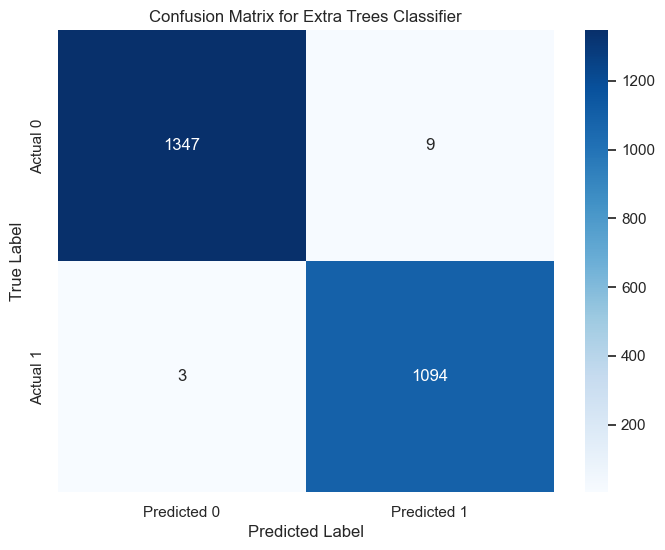

In [19]:
# Calculate confusion matrix
et_conf_matrix = confusion_matrix(Y_test, et_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(et_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


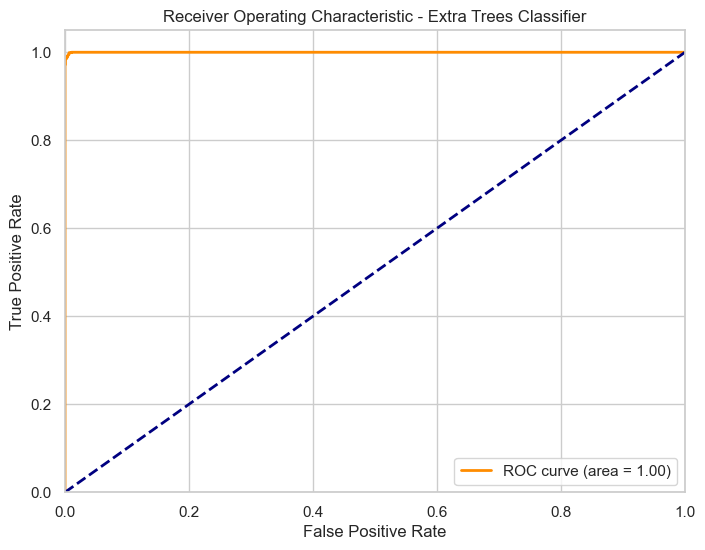

In [20]:
# Calculate the probabilities of predictions
et_probabilities = et_classifier.predict_proba(X_test_scaled)
et_prob_positive = et_probabilities[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, et_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Extra Trees Classifier')
plt.legend(loc="lower right")
plt.show()


confusion matrix and roc curve for logistic regression

In [21]:
# Predict on the test set
log_reg_predictions = log_reg.predict(X_test_scaled)
log_reg_probabilities = log_reg.predict_proba(X_test_scaled)


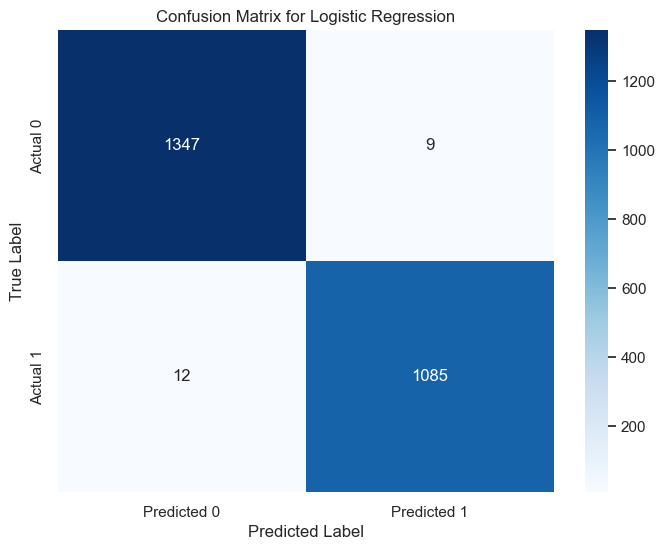

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
log_reg_conf_matrix = confusion_matrix(Y_test, log_reg_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


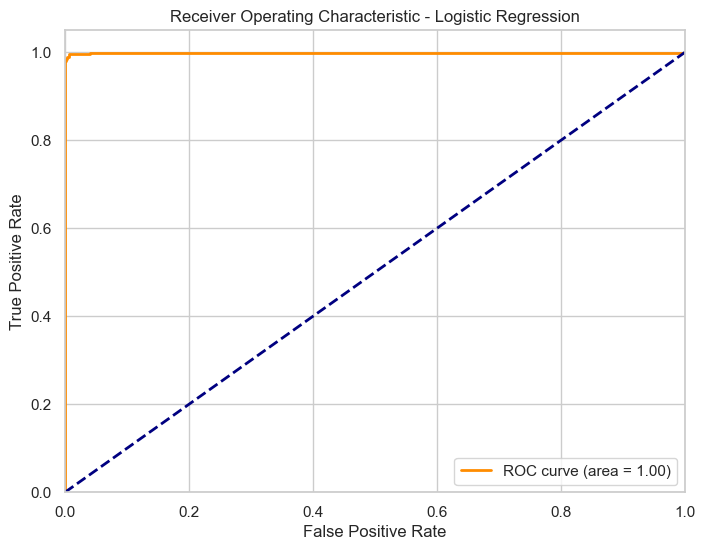

In [23]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, log_reg_probabilities[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


Visual presentation of Important feature

In [26]:
# Extracting feature importances from the classifier
importances = et_classifier.feature_importances_
feature_names = X_train.columns  # Adjust this if X_train doesn't directly give the feature names

# Create a DataFrame of features and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


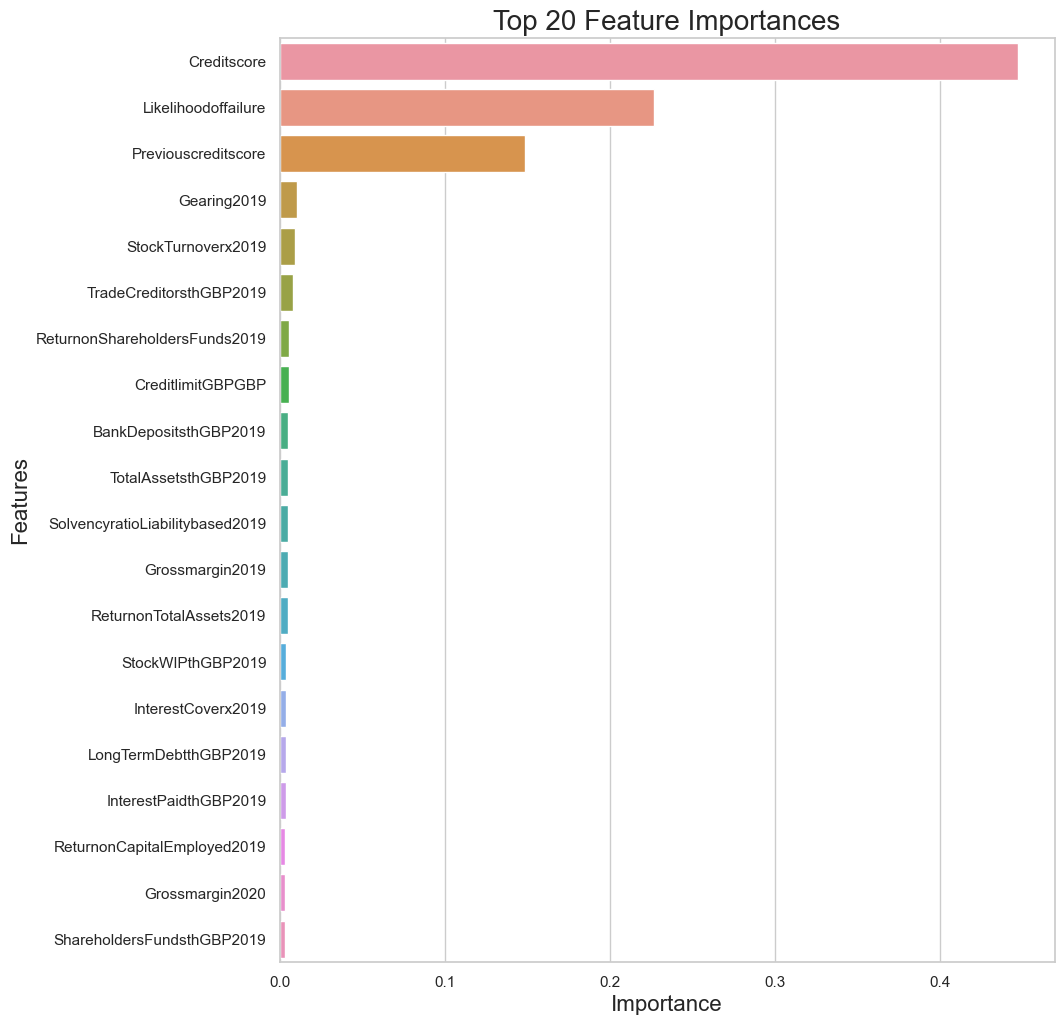

In [29]:
# Define N, the number of top features you want to display
N = 20

# Create a subset of the DataFrame for top N features
top_features = feature_importance_df.head(N)

plt.figure(figsize=(10, 12))  # Adjust size appropriately for N features

# Creating a barplot to visualize the feature importances of top N features
sns.barplot(x='Importance', y='Feature', data=top_features)

plt.title('Top {} Feature Importances'.format(N), fontsize=20)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.show()
